In [4]:
!pip install -U scikit-learn
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U datasets
!pip install -U transformers
!pip install -U torch torchvision torchaudio
!pip install -U accelerate

!pip uninstall -y torch_xla
!pip install --upgrade transformers torch


Found existing installation: torch_xla 2.8.0
Uninstalling torch_xla-2.8.0:
  Successfully uninstalled torch_xla-2.8.0


### Lesson1

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Lesson-2

In [ ]:
#lesson2a.py
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for better visualization
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


#####   To evaluate our model, we need to divide the dataset into two parts: training data (used to train the model) and testing data (used to assess the model’s performance).

In [17]:
#lesson2b.py
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

from sklearn.model_selection import train_test_split

#Split data into features (X) and labels (y)
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DataFrames for better visualization
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['species'] = y_train
test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['species'] = y_test

# Display the training and testing sets
print("Training Set:")
print(train_df.head())
print("\nTesting Set:")
print(test_df.head())

Training Set:
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                4.6               3.6  ...               0.2        0
1                5.7               4.4  ...               0.4        0
2                6.7               3.1  ...               1.4        1
3                4.8               3.4  ...               0.2        0
4                4.4               3.2  ...               0.2        0

[5 rows x 5 columns]

Testing Set:
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                6.1               2.8  ...               1.2        1
1                5.7               3.8  ...               0.3        0
2                7.7               2.6  ...               2.3        2
3                6.0               2.9  ...               1.5        1
4                6.8               2.8  ...               1.4        1

[5 rows x 5 columns]


### With our data prepared, we can train a machine learning model. For this example, we use a Random Forest classifier, a robust algorithm that combines multiple decision trees to improve accuracy.

In [18]:
#lesson2c.py
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

#####   The fit method trains the model using the training data. Behind the scenes, the algorithm analyzes the data to identify patterns that relate features to labels.  ####

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#lesson2c.py
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display predictions
print("Predictions:", y_pred)

#####   The predict method generates predictions for the test data based on the patterns learned during training.   ####

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### To understand how well the model performs, we calculate accuracy, which measures the percentage of correct predictions.

In [21]:
#lesson2d.py
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Visualizing Model Performance

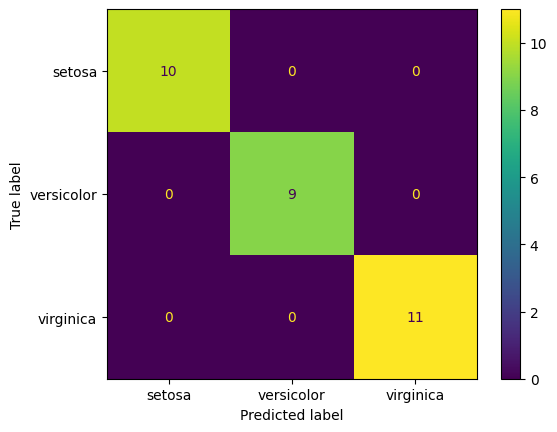

In [24]:
#lesson2d.py
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    # Generate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names).plot()

#   Lesson-3

In [25]:
#lesson3a.py
from sklearn.datasets import load_wine
# Load the Wine dataset
wine = load_wine()
# Display feature and label names
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)
# Display a sample of the data
print("First 5 rows of data:")
print(wine.data[:5])

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']
First 5 rows of data:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


#####   load_* Functions: Load small, built-in datasets (e.g., load_wine, load_iris). 
#####   fetch_* Functions: Fetch larger datasets from external sources (e.g., fetch_openml)

MNIST Dataset Shape (data): (70000, 784)
MNIST Target Shape: (70000,)

First row of mnist.data: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0

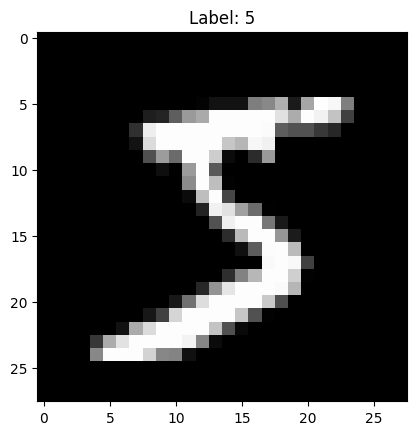

In [36]:
#lesson3b.py
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Display the shape of the dataset features and labels
print("MNIST Dataset Shape (data):", mnist.data.shape)
print("MNIST Target Shape:", mnist.target.shape)

# Display the first row of mnist.data and mnist.target
print("\nFirst row of mnist.data:", mnist.data.iloc[0].values)
print("First value of mnist.target:", mnist.target.iloc[0])

# Display the image
import matplotlib.pyplot as plt

import numpy as np
# Reshape the first row of mnist.data into a 28x28 image
first_image = np.array(mnist.data.iloc[0]).reshape(28, 28)
plt.imshow(first_image, cmap="gray")
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.savefig("./test/minst_image.png")
plt.show()

### Lesson-4

#####  Standardize numerical data ဆိုတာ z-score ရှာခြင်း ဖြစ်တယ်။ formula ကို online တွင်ရှာနိုင်ပါတယ်
##### ဒီ Code က Machine Learning အတွက် ဒေတာပြင်ဆင်ပုံကို ပြသထားတာဖြစ်ပြီး Standardization ဟာ ကိန်းဂဏန်းဒေတာအတွက် ဖြစ်ပြီး One-Hot Encoding ဟာ အမျိုးအစားဒေတာအတွက် ပြုလုပ်တာ ဖြစ်ပါတယ်။

In [ ]:
#lesson4.py
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example data
X = [[1, 2], [3, 4], [5, 6]]

# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Standardized Data:", X_scaled)

# Encode categorical data
categories = [["red"], ["green"], ["blue"]]
encoder = OneHotEncoder()

encoded = encoder.fit_transform(categories).toarray()
print("\nEncoded Data:", encoded)

Standardized Data: [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

Encoded Data: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Lesson-5

In [43]:
#lesson5a.py
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (142, 13)
Testing Set Size: (36, 13)


In [1]:
#lesson5b.py
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Load the Wine dataset

wine = load_wine()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2,
random_state=42)

# Define the parameter grid
param_grid = {
'n_estimators': [10, 50, 100],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
}

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                            cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9785714285714286


### Random Forest Classifier on Breast Cancer Dataset

1.  Import the required libraries

In [3]:
#lesson5c.py

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2. Load and Explore the Dataset

In [4]:
#Load the Breast Cancer dataset
cancer = load_breast_cancer()
# Explore the dataset

print("Dataset Description:\n", cancer.DESCR)  # Detailed description
print("\nFeature Names:\n", cancer.feature_names)  # Feature names
print("\nTarget Names:\n", cancer.target_names)  # Target names (malignant, benign)
print("\nData Shape:", cancer.data.shape)  # Shape of features (rows, columns)
print("\nSample Features:\n", cancer.data[:5])  # First 5 rows of features
print("\nSample Labels:\n", cancer.target[:5])  # First 5 labels

Dataset Description:
 .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is

#####   Split the Data

In [5]:
# Split the dataset into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, test_size=0.2, random_state=42
)
print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (455, 30)
Testing Set Shape: (114, 30)


3. Train the Random Forest Classifier

In [6]:
# Train the model using the training data

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


4. Evaluate the Model


Model Accuracy: 0.9649122807017544


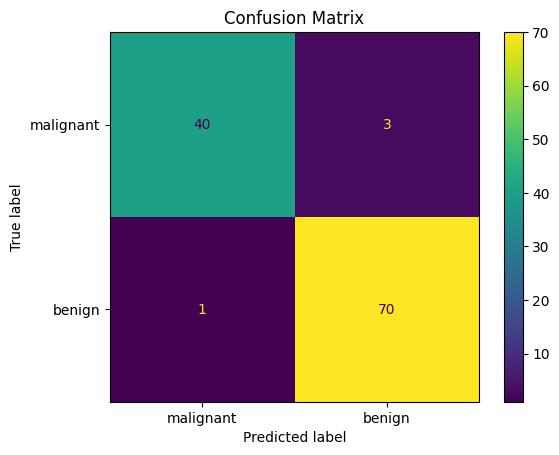

In [7]:
#Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(
model, X_test, y_test, display_labels=cancer.target_names, cmap="viridis"
)
plt.title("Confusion Matrix")
plt.show()

5. Run Inference on New Data

In [20]:
# Example new tumor data (replace with actual measurements)
new_sample = [[15.0, 22.0, 100.0, 0.1, 0.3, 1.2, 0.5, 0.25, 0.4, 1.0,
1.5, 20.0, 0.05, 0.2, 1.0, 0.6, 0.3, 0.1, 0.2, 0.1, 0.5,
0.6, 1.2, 0.8, 0.3, 0.2, 1.5, 0.9, 0.4, 0.3]]

# Make a prediction
prediction = model.predict(new_sample)
probabilities = model.predict_proba(new_sample)

# Display the prediction and probabilities
print("\nPrediction:", "Benign" if prediction[0] == 1 else "Malignant")
print("Class Probabilities:", probabilities)


Prediction: Benign
Class Probabilities: [[0.44 0.56]]


#####   Decision Tree Example with Hugging Face Dataset

c:\Users\bot\Desktop\AI Book\test_NLP\.sklearn_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\bot\Desktop\AI Book\test_NLP\.sklearn_env\lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bot\.cache\huggingface\hub\datasets--scikit-learn--iris. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator.

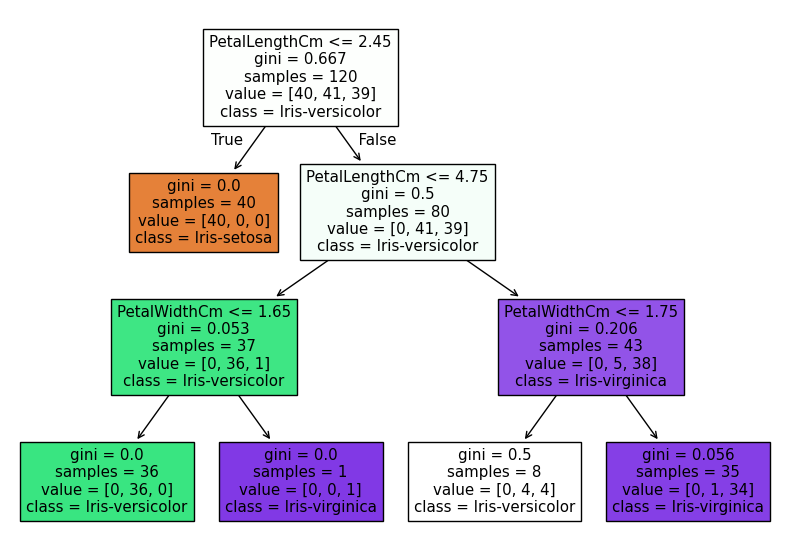

In [2]:
#lesson6.py
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset from Hugging Face
#lesson6.py
from datasets import load_dataset
iris_dataset = load_dataset("scikit-learn/iris", split="train")

# Convert to pandas and prepare features and labels
iris_df = iris_dataset.to_pandas()
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[feature_columns].values
y = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(10, 7))
plot_tree(model,
feature_names=feature_columns,
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
filled=True)
plt.show()


### Code Example Using Hugging Face Models based on CNN

In [6]:
#lesson7.py
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image
import requests
from io import BytesIO

# Let's use a more specific pre-trained model for better results
model_name = "google/vit-base-patch16-224"

# Load pre-trained model and feature extractor
print("Loading model...")

extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image

# Example usage with an online image
image_url = "http://images.cocodataset.org/val2017/000000058111.jpg"
print("Loading image...")
image = load_image_from_url(image_url)

# Prepare image for the model
print("Processing image...")
inputs = extractor(images=image, return_tensors="pt")

# Make prediction
print("Making prediction...")
outputs = model(**inputs)

# Get the predicted class name
predicted_class = model.config.id2label[outputs.logits.argmax().item()]
confidence = outputs.logits.softmax(dim=1).max().item() * 100
print(f"\nPrediction: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

Loading model...
Loading image...
Processing image...
Making prediction...

Prediction: printer
Confidence: 63.06%


### Beginner-Friendly RNN Example

In [2]:
#lesson8.py
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load pre-trained Hugging Face model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Input text
input_text = "Machine learning is"
inputs = tokenizer(input_text, return_tensors="pt")

# Generate next words
outputs = model.generate(**inputs, max_length=15)
print("Generated Text:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Machine learning is a very powerful tool for learning about the world around us.


### Hugging Face Transformer Example

1. First, install TensorFlow|

In [8]:
!pip install tensorflow
!pip install tf-keras

     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     -------------------------------------- 0.0/331.7 MB 131.3 kB/s eta 0:42:07
     -------------------------------------- 0.0/331.7 MB 131.3 kB/s eta 0:42:07
     -------------------------------------- 0.1/331.7 MB 163.8 kB/s eta 0:33:45
     -------------------------------------- 0.1/331.7 MB 172.4 kB/s eta 0:32:04
     -------------------------------------- 0.1/331.7 MB 228.2 kB/s eta 0:24:14
     -------------------------------------- 0.1/331.7 MB 235.7 kB/s eta 0:23:27
     -------------------------------------- 0.1/331.7 MB 293.9 kB/s eta 0:18:49
     -------------------------------------- 0.2/331.7 MB 348.2 kB/s eta 0:15:53
     -------------------------------------- 0.2/331.7 MB 393.1 kB/s 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB 119.1 kB/s eta 0:00:14
      --------------------------------------- 0.0/1.7 MB 119.1 kB/s eta 0:00:14
     - -------------------------------------- 0.1/1.7 MB 193.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/1.7 MB 196.9 kB/s eta 0:00:09
     -- ------------------------------------- 0.1/1.7 MB 238.1 kB/s eta 0:00:07
     -- ------------------------------------- 0.1/1.7 MB 277.4 kB/s eta 0:00:06
     --- ------------------------------------ 0.2/1.7 MB 328.1 kB/s eta 0:00:05
     ---- ----------------------------------- 0.2/1.7 MB 389.1 kB/s eta 0:00:04
     ----- ---------------------------------- 0.2/1.7 MB 424.3 kB/s eta 0:00


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Create lesson10.py as defined below

In [5]:
#lesson9.py
from transformers import BertTokenizer, BertModel

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Tokenize input
text = "Hugging Face simplifies machine learning."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

# Get embeddings
embeddings = outputs.last_hidden_state
print("Embedding Shape:", embeddings.shape)

Embedding Shape: torch.Size([1, 10, 768])


### Tokenization
##### Example: Tokenizing Text

In [ ]:
#lesson10a.py
from transformers import AutoTokenizer

# Load a tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize a sentence
text = "Hugging Face simplifies machine learning.\nKing and Queen are royal titles."
tokens = tokenizer(text)
print("Tokens:", tokens)

Tokens: {'input_ids': [[101, 1037, 2200, 2146, 6251, 2008, 3791, 11687, 4667, 2686, 1012, 102], [101, 1037, 2460, 2742, 1012, 102, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]}


Example: Loading a Pre-trained Model

In [1]:
#lesson10b.py
from transformers import AutoModel

# Load a pre-trained BERT model
model = AutoModel.from_pretrained("microsoft/phi-1")
print("Model Loaded:", model)

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

Model Loaded: PhiModel(
  (embed_tokens): Embedding(51200, 2048)
  (layers): ModuleList(
    (0-23): 24 x PhiDecoderLayer(
      (self_attn): PhiAttention(
        (q_proj): Linear(in_features=2048, out_features=2048, bias=True)
        (k_proj): Linear(in_features=2048, out_features=2048, bias=True)
        (v_proj): Linear(in_features=2048, out_features=2048, bias=True)
        (dense): Linear(in_features=2048, out_features=2048, bias=True)
      )
      (mlp): PhiMLP(
        (activation_fn): NewGELUActivation()
        (fc1): Linear(in_features=2048, out_features=8192, bias=True)
        (fc2): Linear(in_features=8192, out_features=2048, bias=True)
      )
      (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
      (resid_dropout): Dropout(p=0.0, inplace=False)
    )
  )
  (rotary_emb): PhiRotaryEmbedding()
  (embed_dropout): Dropout(p=0.0, inplace=False)
  (final_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
)


Example: Classifying Sentiments:

In [4]:
#lesson11.py
from transformers import pipeline

# Load the sentiment analyzer
sentiment_analyzer = pipeline(
task="sentiment-analysis",
model="distilbert/distilbert-base-uncased-finetuned-sst-2-english"
)

# Analyze some text
text = "I love learning about AI!"
result = sentiment_analyzer(text)

# Print the result
print(result)

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.99968421459198}]


Example: Summarizing Text

In [1]:
#lesson12.py
from transformers import pipeline

# Load a summarization pipeline
summarizer = pipeline("summarization", model= "facebook/bart-large-cnn")

# Summarize text
text = """
Hugging Face, an innovative leader in the artificial intelligence and machine learning space,
provides a comprehensive suite of tools and libraries designed to simplify and accelerate the development of machine learning models and applications;
among its most notable offerings is the Transformers library, which features an extensive collection of pre-trained, state-of-the-art models that enable developers,
language translation, sentiment analysis, question answering, and text generation, all while significantly reducing the computational resources, time,..
ing cutting-edge AI capabilities more accessible and empowering a global community to create innovative solutions across diverse domains.
"""
summary = summarizer(text)
print(summary)

2025-12-11 08:54:04.248580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765443244.610209      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765443244.713868      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 142, but your input_length is only 125. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


[{'summary_text': 'Hugging Face, an innovative leader in the artificial intelligence and machine learning space, provides a comprehensive suite of tools and libraries. Among its most notable offerings is the Transformers library, which features an extensive collection of pre-trained, state-of-the-art models.'}]


Other good models you can try:

In [2]:
#Replace the model name with any of these:
models = [
"google/pegasus-xsum",        # Good for very short summaries
"philschmid/bart-large-cnn-samsum",  # Good for conversational text
"sshleifer/distilbart-cnn-12-6",     # Faster, smaller version
"t5-small",                   # Very lightweight, good for starting
]

# Example using a different model
summarizer = pipeline("summarization", model=models[2])
summary = summarizer(text)
print(summary)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 142, but your input_length is only 125. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


[{'summary_text': ' Hugging Face is an innovative leader in the artificial intelligence and machine learning space . The Transformers library features an extensive collection of pre-trained, state-of-the-art models that enable developers, including translation, sentiment analysis, question answering, and text generation, all while significantly reducing the computational resources, time, and time .'}]


#### Fine-tuning a Pre-trained Model

Fine-tuning a Model for Text Classification

In [11]:
#lesson13.py
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Step 1: Load and preprocess dataset
data = load_dataset("imdb")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

tokenized_data = data.map(tokenize, batched=True)

# Step 2: Load pre-trained model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Step 3: Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    logging_strategy="steps",
    logging_steps=100,
    logging_first_step=True,
    report_to="none"  # disable wandb logs in console
)

# Step 4: Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"]
)

# Step 5: Train and evaluate
trainer.train()

# Save the model and tokenizer to a specific directory
model.save_pretrained("./my_model")
tokenizer.save_pretrained("./my_model")

2025-12-16 10:54:23.496227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765882463.678060      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765882463.729877      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.201800,0.182002
2,0.145600,0.203302
3,0.072800,0.263168


('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.txt',
 './my_model/added_tokens.json',
 './my_model/tokenizer.json')

The Training Process (from the code):

    Loads the IMDB movie reviews dataset
    Prepares the text in a way BERT can understand
    Trains BERT to recognize positive and negative reviews
    Saves the improved model.
    
Now, here's how to use your fine-tuned model after training:

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "hmuegyi/review-classifier"
)

model.config.id2label = {0: "NEGATIVE", 1: "POSITIVE"}
model.config.label2id = {"NEGATIVE": 0, "POSITIVE": 1}

model.save_pretrained("./my_model")

In [ ]:
#lesson14.py
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
  
# 1. Load your fine-tuned model and tokenizer
model_path = "./my_model"  # This is where your model was saved
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
 
# 2. Function to predict sentiment
def predict_sentiment(text):
    
    # Prepare the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512) 
    
    # Get prediction
    outputs = model(**inputs)
    prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)
    
    # Convert prediction to human-readable format
    labels = ['Negative', 'Positive']
    label = labels[prediction.argmax().item()]
    score = prediction.max().item()   
    return {
        'text': text,
        'sentiment': label,
        'confidence': f'{score:.2%}'
    }
  
# 3. Try it out!
reviews = [
    "This movie was amazing! I hated every minute of it.",
    "What a waste of time. I really didn't enjoy it.",
    "It was okay, not great but not terrible either."
]
  
# Check each review
for review in reviews:
    result = predict_sentiment(review)
    print("\nReview:", result['text'])
    print("Sentiment:", result['sentiment'])
    print("Confidence:", result['confidence'])

In [16]:
import shutil

# Zip the 'result' folder
shutil.make_archive("/kaggle/working/results", 'zip', "/kaggle/working/results")

# Zip the 'my_model' folder
shutil.make_archive("/kaggle/working/my_model", 'zip', "/kaggle/working/my_model")


'/kaggle/working/my_model.zip'

### Performing Inference Using Your Uploaded Model
Use the Pipeline for Inference:

In [5]:
#lesson15.py
from transformers import pipeline

# Load model from Hugging Face Hub
classifier = pipeline("sentiment-analysis", model="hmuegyi/review-classifier")

# Test the model
result = classifier("This movie was absolutely amazing!")
print(result)

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9981504082679749}]
